# Nivel de Figura vs. Nivel de Fondo

Antes de terminar este día en el que hemos conocido a Seaborn, quiero retomar un concepto que hemos trabajado con Matplotlib, y es que también en Seaborn podemos acceder a nuestros gráficos tanto desde el **nivel del axes** (que es el cuadro que contiene al gráfico), como desde el **nivel de la figura** (que es el fondo que contiene uno a más axes a la vez).

Entonces, esa una clasificación que podemos hacer de las funciones que hemos usado:
* las funciones que trabajan a nivel del axes
* las funciones que trabajan al nivel de la figura.

Por un lado tenemos a las funciones que trabajan desde el **nivel del axes**, porque dibujan los datos en un objeto de matplotlib simple (recuerda que en realidad Seaborn está trabajando por encima de Matplotlib). Estas funciones son las que vemos desprenderse en el diagrama de abajo, como `scatterplot()`, `histplot()` y `stripplot()`. Los gráficos que obtienes con estas funciones simplemente son el resultado de lo que devuelve la función que usemos para crearlo (por ejemplo `histplot()`).

Por otro lado, la mayoría de los gráficos que estuvimos haciendo hoy fueron creados por medio de funciones que trabajan desde el **nivel de la figura** (con `relplot()`, `displot()` y `catplot()`), ya que también lo hacen en la interface de matplotlib, pero se aprovechan de un objeto de Seaborn como `FacetGrid`, o `PairGrid` (al cual hemos usado en la lección sobre "*Funciones de Nivel Inferior*"). Estos objetos permiten trabajar en una sola figura que se encarga de manejar cada una de las funciones de nivel de axes que la componen.

![](funciones_seaborn.png)

Por eso he vuelto a colocar este gráfico aquí, ya que quiero demostrarte que todo lo que hemos hecho hasta ahora con `relplot()`, `displot()` y `catplot()` (que son funciones de nivel de la figura), también puede hacerse con las funciones propias de cada gráfico (como `scatterplot()`, `histplot()` y `stripplot()`) que funcionen al nivel del axes.

Volvamos a cargar a nuestro dataset de pingüinos, y veamos algunos ejemplos.

In [1]:
import seaborn as sns

In [2]:
pinguinos = sns.load_dataset("penguins")

Ahora voy a crear un **histograma** que represente el *largo de las aletas* de los pingüinos, separados por *especies*. Voy a hacerlo primero con un `displot()` al **nivel de la figura**, y luego directamente con un `histplot()` al **nivel del axes**.


### displot() al nivel de figura

C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


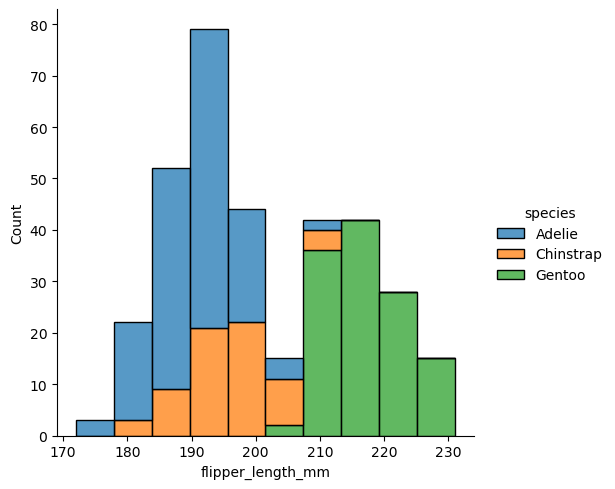

In [3]:
sns.displot(data=pinguinos,
           x="flipper_length_mm",
           hue="species",
           multiple="stack");

### histplot() al nivel del axes

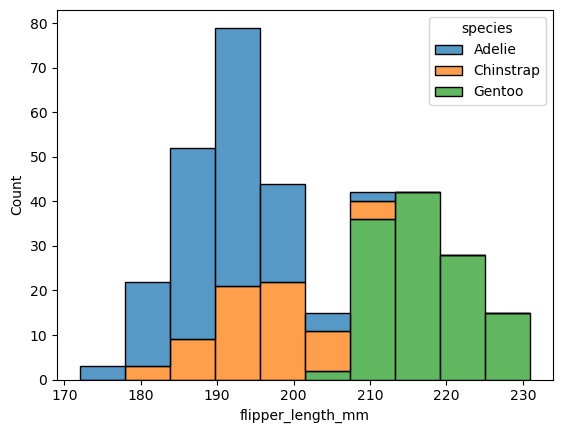

In [4]:
sns.histplot(data=pinguinos,
           x="flipper_length_mm",
           hue="species",
           multiple="stack");

La primera observación es que ambos gráficos muestran la misma distribución y de la misma manera. Técnicamente son iguales.

Eso sí, puedes notar que hay pequeñas diferencias, como que en el gráfico a **nivel de figura** la leyenda se coloca **fuera del gráfico**, y que tiene una **forma ligeramente diferente** (hablaremos más de eso en breve).

La característica más útil que ofrecen las funciones a **nivel de figura** (el ` displot()` en este caso), es que pueden crear fácilmente figuras con **múltiples subgráficos**.

Por ejemplo, en lugar de apilar las tres distribuciones para cada *especie* de pingüinos en los mismos ejes, podemos "facetarlas" trazando cada distribución a lo largo de las columnas de la figura, con el parámetro `col`.

C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


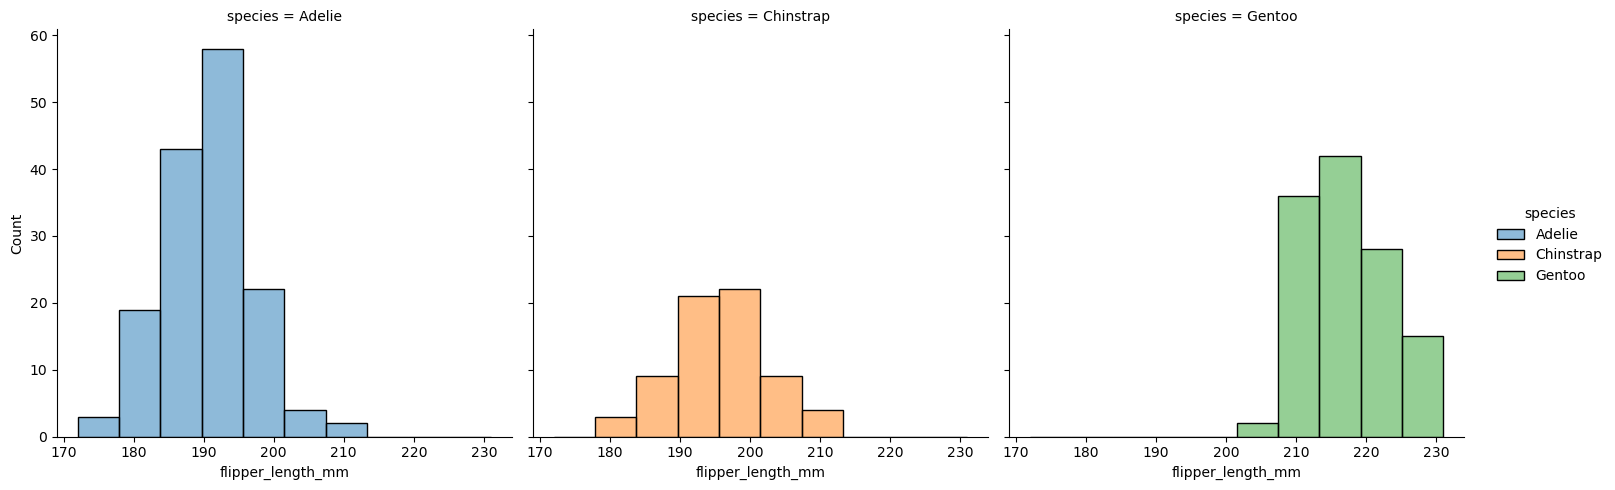

In [5]:
sns.displot(data=pinguinos,
           x="flipper_length_mm",
           hue="species",
           col="species");

Lo que en realidad sucede aquí es que las funciones a **nivel de figura** *envuelven* a las funciones del **nivel del axes**, y le pasan los argumentos de sus parámetros específicos (como el tamaño de los bins para un histograma) a la función de axes.

Esto parece muy conveniente, pero hay una desventaja: cuando trabajas al **nivel de la figura**, no puedes acceder a algunos parámetros específicos de las funciones del **nivel del axes**, y eso te hace perder flexibilidad.

Además, debemos tener en cuenta que las funciones a **nivel de figura** en Seaborn gestionan su propia figura completa, lo que significa que no se diseñaron para incorporarse en gráficos ya existentes, ya que controlan la inicialización de la figura. Esta característica les permite implementar funcionalidades específicas, como colocar la leyenda fuera del gráfico, que es lo que acabamos de ver en el ejemplo anterior.

Ahora veamos cómo podemos configurar los gráficos que se encuentran dentro de una función de figura en Seaborn. Las funciones a **nivel de figura** en Seaborn devuelven una instancia de `FacetGrid`, que ofrece métodos para personalizar el gráfico de manera inteligente.

Veamos un ejemplo:

C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


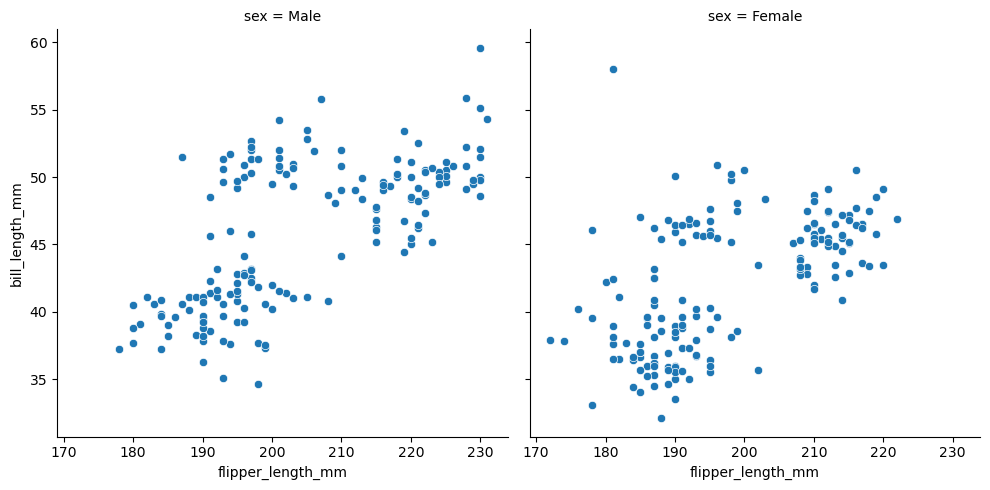

In [6]:
sns.relplot(data=pinguinos,
           x="flipper_length_mm",
           y="bill_length_mm",
           col="sex");

Como esta función **devuelve un gráfico**, que es el que estamos viendo, podemos almacenar esta instancia del gráfico en una variable `graf` y luego modificar cosas de ese gráfico con líneas de código adicionales.

Por ejemplo, es posible modificar las **etiquetas de los ejes externos** con una sola línea de código, facilitando la personalización sin complicaciones.

Si ahora escribes el nombre de la variable `graf`, seguida de un punto (.), y presional la tecla **TAB**, verás que ahora tienes acceso a los elementos individuales de la instancia de tu gráfico, y puedes modificarlos con una sola línea.

En el caso de las **etiquetas de los ejes externos**, busco a `set_axis_labels`.

C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


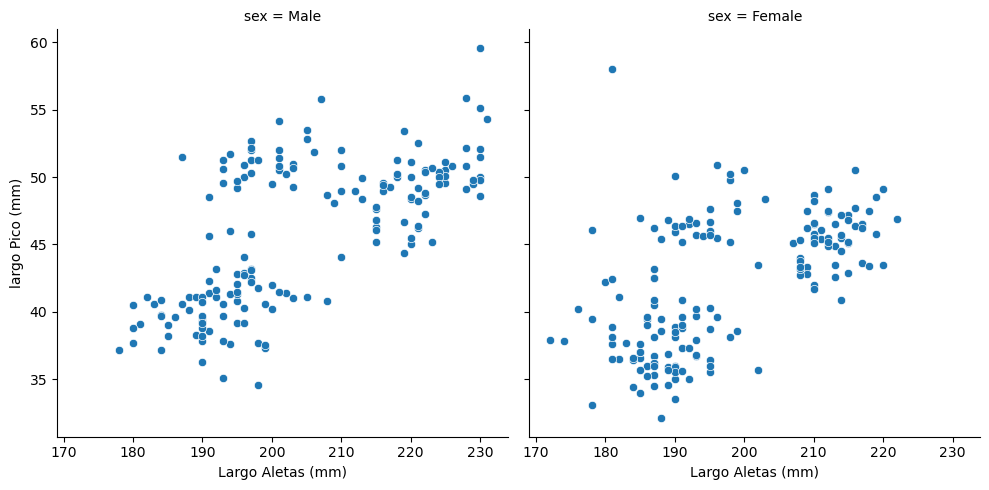

In [7]:
graf = sns.relplot(data=pinguinos,
           x="flipper_length_mm",
           y="bill_length_mm",
           col="sex")
graf.set_axis_labels("Largo Aletas (mm)",
                    "largo Pico (mm)");

A pesar de que esto es conveniente, ten en cuenta que nos agrega un nivel extra de complejidad, ya que nos obliga a recordar que este método sólo existe cuando usamos funciones del **nivel de la figura**.